## L1 - Linear models and gradient descent

### Books
1. [Deep Learning, I. Goodfellow, Y. Bengio and A. Courville](http://www.deeplearningbook.org/)
2. [Neural networks for pattern recognition, C. Bishop](http://cs.du.edu/~mitchell/mario_books/Neural_Networks_for_Pattern_Recognition_-_Christopher_Bishop.pdf)
3. [Machine learning: a probabilistic perspective, K. Murphy](http://dsd.future-lab.cn/members/2015nlp/Machine_Learning.pdf)

### 0. Basic classification

Here you can see basic (possible, non standard) classification of [machine learning](https://en.wikipedia.org/wiki/Machine_learning) tasks.
1. [Supervised learning](https://en.wikipedia.org/wiki/Supervised_learning)
 1. [Regression](https://en.wikipedia.org/wiki/Regression_analysis)
 2. [Classification](https://en.wikipedia.org/wiki/Statistical_classification)
 3. [Ranking](https://en.wikipedia.org/wiki/Learning_to_rank)
2. [Reinforcment learning](https://en.wikipedia.org/wiki/Reinforcement_learning)
3. [Unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning)
 1. Clustering 
 2. Manifold learning
 3. Matrix decompostion (factorization)
 4. Dimension reduction
 
In this lab we consider only supervised learning. Namely, linear regression and binary linear classification, as simple methods for beginning.

### 1. Supervised learning basics
A supervised learning algorithm is an algorithm that is able to learn from data. Now we need only to clarify what is data and what it means to learn?

Let $\{x_i\}_{i=1}^{\mathcal{l}} \subset \mathbb{X} = \mathbb{R}^{n}$ and $\{y_i\}_{i=1}^{\mathcal{l}} \subset \mathbb{Y}$. Here $\mathbb{X}$ is the whole set of objects and $\mathbb{Y}$ is all possible labels of objects, so $\{x_i\}_{i=1}^{\mathcal{l}}$ is subset with known labels $\{y_i\}_{i=1}^{\mathcal{l}}$. We want to find algorithm, that can predict $y$ for any $x \in \mathbb{X}$. Actually, $x = (x^1, \dots, x^n)$ is some vector of features (formal description), but $x^k$ can have different nature. 

* $x^k \in \{0, 1\}$ – binary feature, boolean flag
* $x^k \in \{1,\dots, m\}$ – categorical (nominal), classification of entities into particular categories.
* $x^k \in \{1,\dots, m\}^<$ – ordinal, classification of entities in some kind of ordered relationship.
* $x^k \in \mathbb{R}$ – cardinal, classification based on a numerical value.

Categorical features are commonly encoded in some way (for exaple [one-hot encoding](https://en.wikipedia.org/wiki/One-hot)) to ignore false ordering (important for metric algorithms). Moreover it's possible to cast any type of feature to $\mathbb{R}$, that's why we suppouse that $\mathbb{X} = \mathbb{R}^{n}$ further.

Process of finding algorithm, that can predict labels, is called training. Usually, it is reduced to minimization problem of the empirical risk.
$$\arg \min_{\theta} Q(\theta) = \arg \min_{\theta} \frac{1}{\mathcal{l}}\sum_{i=1}^{\mathcal{l}} \mathcal{L}(f(x_i | \theta), y_i).$$
Here $\mathcal{L}$ – some loss function that shows how good we predict $y$, and $f(x|\theta)$ is parametric function, where $\theta \in \Theta$.

### 2. Linear regression
For regression task $\mathbb{Y} = \mathbb{R}$. In case of linear model we have learning vector of parameters $w \in \mathbb{R}^n$ and predict $y$ as 
$$y = w^Tx + b.$$

For simplicity, let the last element of $x$ is always $1$ and $w$ is concatenation of $[w, b]$. So, we can rewrite model as $y = w^Tx$. For MSE (mean square error) we have following optimization problem
$$\arg \min_{w} Q(w) = \arg \min_{w} \sum_{i=1}^{\mathcal{l}}\big(w^Tx_i - y_i\big)^2.$$

Let $X$ is matrix, where $i$-th row is feature vector of $i$-th object and $Y$ – vector of labels. In this case our expression can be rewritten in matrix form
$$\arg\min_{w}||Xw - Y ||_{2}.$$
But this problem is already well studied and has the analytical solution
$$w = (X^TX)^{-1}X^TY.$$

#### Exercises
1. Let $y = sin(x) + \varepsilon$, where $x \in [0, 2\pi]$ and $\varepsilon \sim \mathcal{N}(0, 0.1)$. Generate 20 train samples and try to learn regression model.
2. Plot train data and model's predictions.
3. As you see, model has no enough capacity to fit train data. Let's add polynomial features, namely $x^2$ and $x^3$.
4. Train linear model one more time and plot results again.
5. What happens if you add more features, for example full range $x^{0},\dots,x^{7}$? 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

%matplotlib inline

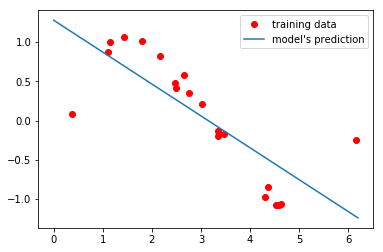

In [2]:
np.random.seed(123)
x = np.random.sample(20)*2*np.pi
y = np.sin(x) + np.random.randn(20)*0.1

def least_squares_method(x, y, degree=1):
    X = np.vander(x, degree+1)
    Y = np.reshape(y, (len(y), 1))
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
    return sp.poly1d(w.T[0])

function = least_squares_method(x, y, 1)

x_range = np.arange(0, 2*np.pi, 0.1)
plt.plot(x, y, 'ro', label='training data')
plt.plot(x_range, function(x_range), label='model\'s prediction')
plt.legend()
plt.show()

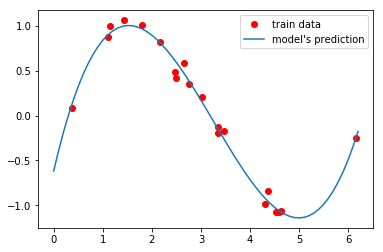

In [3]:
function = least_squares_method(x, y, 3)

plt.plot(x, y, 'ro', label='train data')
plt.plot(x_range, function(x_range), label='model\'s prediction')
plt.legend()
plt.show()

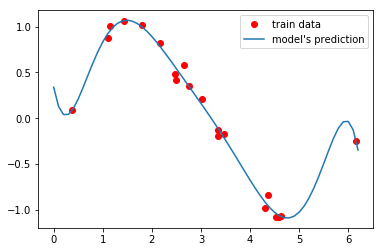

In [4]:
function = least_squares_method(x, y, 7)

plt.plot(x, y, 'ro', label='train data')
plt.plot(x_range, function(x_range), label='model\'s prediction')
plt.legend()
plt.show()

При увеличении степени полинома растёт способность нашей модели просто запоминать обучающую выборку, для седьмой степени мы ещё не наблюдаем серьёзного переобучения на отрезке $[0, 2\pi]$, но мы не можем продолжать увеличивать степень дальше некоторой границы не вызывая переобучения.

### 3. Validation
The data used to build the final model usually comes from multiple datasets. In particular, three data sets are commonly used in different stages of the creation of the model.

1. We initially fit our parameters on a __training dataset__, that consists of pairs of a feature vector and the corresponding answer. The current model is run with the training dataset and produces a result, which is then compared with the target, for each input vector in the training dataset. Based on the result of the comparison and the specific learning algorithm being used, the parameters of the model are adjusted. The model fitting can include both variable selection and parameter estimation.

2. Second one called the __validation dataset__. The validation dataset provides an unbiased evaluation of a model fit on the training dataset while tuning the model's hyperparameters (e.g. regularization coefficient or number of hidden units in a neural network). Validation datasets can be used for regularization by early stopping: stop training when the error on the validation dataset increases, as this is a sign of overfitting to the training dataset. This simple procedure is complicated in practice by the fact that the validation dataset's error may fluctuate during training. This complication has led to the creation of many ad-hoc rules for deciding when overfitting has truly begun.

3. Finally, the __test dataset__ is a dataset used to provide an unbiased evaluation of a final trained model.

Cross-validation is a validation technique for estimating how accurately a predictive model will perform in practice. The goal of cross validation is to limit problems like overfitting, give an insight on how the model will generalize to an independent dataset.

Cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset and making validation on the other. To reduce variability, multiple rounds of cross-validation are performed using different partitions, and the validation results are caveraged over the rounds to estimate a final predictive model.

There are following types:
1. Leave-p-out cross-validation - using p observations as the validation set with all possible ways.
2. k-fold cross-validation - split data into k folds and using each one as validation set.
3. Holdout validation - randomly split data into training and validation set
4. Repeated random sub-sampling validation - repeatedly make random splits of data into training and validation set

#### Exercises
1. Generate 20 validation samples
2. Check quality of your model on train set and validation set.
3. Have you experienced [overfitting](https://en.wikipedia.org/wiki/Overfitting)?
4. Please, read [this article](https://en.wikipedia.org/wiki/VC_dimension) to learn more about model capacity and VC-dimension.

In [5]:
np.random.seed(124)
validation_x = np.random.sample(20)*2*np.pi
validation_y = np.sin(validation_x) + np.random.randn(20)*0.1

for i in range(1, 11):
    function = least_squares_method(x, y, i)
    print('Loss function on trainig set and validation set for %d degree:' %(i))
    print(((y - function(x))**2).sum())
    print(((validation_y - function(validation_x))**2).sum())

Loss function on trainig set and validation set for 1 degree:
4.00176804582
4.15906186156
Loss function on trainig set and validation set for 2 degree:
4.00108702567
4.16875145625
Loss function on trainig set and validation set for 3 degree:
0.11239479784
0.4344595715
Loss function on trainig set and validation set for 4 degree:
0.10871419319
0.450710536139
Loss function on trainig set and validation set for 5 degree:
0.095907389534
0.742130201857
Loss function on trainig set and validation set for 6 degree:
0.0948248017163
0.901700447451
Loss function on trainig set and validation set for 7 degree:
0.0877540379281
0.436010709679
Loss function on trainig set and validation set for 8 degree:
0.083306898074
4.46546864432
Loss function on trainig set and validation set for 9 degree:
0.0825889467536
38.3717265307
Loss function on trainig set and validation set for 10 degree:
0.210534808927
3.40379384823


До 3 степени модель недостаточно хорошо обучается, а начиная с 9 степени мы наблюдаем переобучение.

### 4. Binary linear classification
Let $\mathbb{Y} = \{-1, +1\}$ for binary classification. So linear model looks like
$$sign(w^Tx + b),$$
where $w$ is normal to the separating plane, which is defined parametrically $w^Tx+b=0$. In the half-space, which normal is directed, all points has class +1, otherwise -1. Let's assume that all points of hyperplane has class +1 to resolve the ambiguity. Also we rewrite model in the short variant $sign(w^Tx)$.

As with regression, training of linear classifier may be reduced to an optimization problem. We only have to specify the loss function. The most nature option is
$$\mathcal{L}(y_{pred}, y_{true}) = [y_{pred} \neq y_{true}] = [M < 0],$$
where $M$ is the margin value $yw^Tx$, which indicates how far the classifier puts a point in its class. But this loss has one drawback, it's not differentiable. That's why the optimization problem becomes very complex. However we can use any other function, which majorizes this loss. You can find some popular options below

1. MSE has one big advantage, we optimize convex function with a local minimum. Moreover analytic solution exists.
$$\big(w^Tx - y \big)^2$$

2. Hinge loss function makes our linear classifier [SVM](https://en.wikipedia.org/wiki/Support_vector_machine) (support vector machine).
$$max \big(0, 1 - yw^Tx \big)$$

3. Logistic loss function has a probabilistic meaning. In particular, this loss leads us to the optimal [Bayesian classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) under certain assumptions on the distribution of features. But it's a different story. So it is often used in practice.
$$\ln \big( 1 + \exp(-yw^Tx) \big)$$

#### Exercises
1. Let $\mathbb{P}\{y=1|x\} = \sigma(wx)$, where $\sigma(z) = \frac{1}{1 + \exp(-z)}$. Show that problem below it is nothing like the maximization of the likelihood.
$$\arg\min_{w}Q(w) = \arg\min_{w} \sum_{x, y} \ln \big(1 + \exp(-yw^Tx )) \big)$$
2. Plot all loss functions in the axes $M \times L$.
3. Generate two normally distributed sets of points on the plane.
4. Let points of 1th set (red color) have class +1 and point of 2d set (blue color) have -1.
5. Train linear classifier with MSE (use analytical solution), which splits these sets.
6. Plot points and separating line of trained classifier.
7. What is time comlexity of your solution?

$$\mathbb{P}\{y=1|x\} = \frac{1}{1 + \exp(-w^Tx)} \Rightarrow \mathbb{P}\{y=-1|x\} = 1 - \frac{1}{1 + \exp(-w^Tx)} = \frac{\exp(-w^Tx)}{1 + \exp(-w^Tx)} = \frac{1}{1 + \exp(w^Tx)}$$ Тогда запишем как выглядит задача максимизации функции правдоподобия для выборки которая соответствует тому что наша функция задаваемая параметрами $w$ правильно классифицирует все элементы $x$. Сама эта функция правдоподобия выглядит так: $$f(x,y\ |w) = \prod \limits_{x, y} \frac{1}{1+\exp(-yw^Tx)}$$ Так как $y$ как раз примет нужное значение $(1$ или $-1)$ в зависимости от того как следует классифицировать $x$ и на какую вероятность нужно домножить произведение. Тогда задача максимизации правдоподобия выглядит следующим образом: $$\arg\max_{w} \prod \limits_{x, y} \frac{1}{1+\exp(-yw^Tx)}$$ Теперь нам нужно свести нашу задачу к максимизации правдоподобия: $$\arg\min_{w}Q(w) = \arg\min_{w} \sum_{x, y} \ln \big(1 + \exp(-yw^Tx )) \big)$$ Домножим на $-1$ превратив в задачу максимизации, прибавим к каждому слагаемому $\ln(1) = 0$ и внесём всё под логарифм: $$\arg\min_{w}Q(w) = \arg\max_{w}\big( \ln\big(\prod \limits_{x, y} \frac{1}{1+\exp(-yw^Tx)}\big)\big)$$ Остаётся только заметить что это в точности равно нашей задаче максимизации правдоподобия так как логарифм возрастающая функция и достигнет максимума в той же точке где сама функция достигнет максимума. Значит наша задача действительно ничто иное как максимизация правдоподобия.

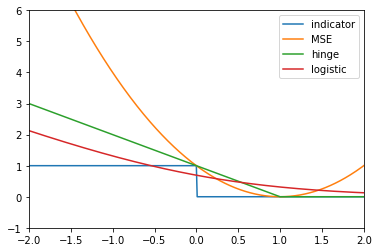

In [6]:
x_range = np.arange(-3, 4, 0.01)

def indicator_loss_function(M):
    return(M < 0)

def MSE_loss_function(M):
    return((M-1)**2)

def hinge_loss_function(M):
    ans = []
    for num in M:
        ans.append(max(0, 1-num))
    return ans

def logistic_loss_function(M):
    return np.log(1+np.e**(-M))

plt.axis([-2, 2, -1, 6])
plt.plot(x_range, indicator_loss_function(x_range), label='indicator')
plt.plot(x_range, MSE_loss_function(x_range), label='MSE')
plt.plot(x_range, hinge_loss_function(x_range), label='hinge')
plt.plot(x_range, logistic_loss_function(x_range), label='logistic')
plt.legend()
plt.show()

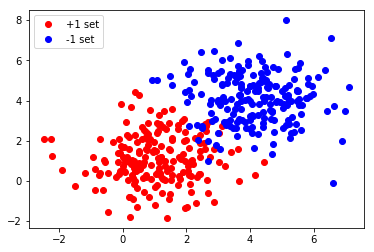

In [7]:
np.random.seed(125)
red_points = np.random.multivariate_normal((1, 1), np.eye(2)*1.5, 200)
blue_points = np.random.multivariate_normal((4, 4), np.eye(2)*1.5, 200)

plt.plot(red_points[:,0], red_points[:,1], 'or', label='+1 set')
plt.plot(blue_points[:,0], blue_points[:,1], 'ob', label = '-1 set')
plt.legend()

In [8]:
X = np.concatenate((red_points, blue_points), axis=0)
X = np.concatenate((X, np.ones((len(X), 1))), axis=1)
Y = np.concatenate((np.ones((len(red_points), 1)), -np.ones((len(blue_points), 1))), axis=0)

w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)

Мы получили коэффициенты функции классификатора, разделяющая прямая задаётся уравнением: $w_0x + w_1y + w_2 = 0$, соответственно нужно вывести функцию: $y = -\frac{w_0x+w_2}{w_1}$.

[-0.26691705] [-0.2376562] [ 1.30545409]


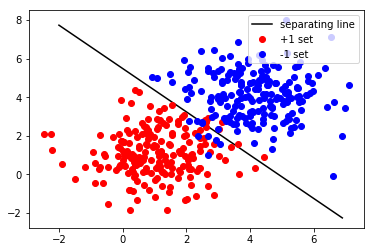

In [9]:
def separating_line(w, x):
    return -(w[0]*x + w[2])/w[1]

print(w[0], w[1], w[2])

x_range = np.arange(-2, 7, 0.1)
plt.plot(x_range, separating_line(w, x_range), 'k', label='separating line')
plt.plot(red_points[:,0], red_points[:,1], 'or', label='+1 set')
plt.plot(blue_points[:,0], blue_points[:,1], 'ob', label = '-1 set')
plt.legend()
plt.show()

Пусть количество точек равно $n$ и они находятся в пространстве размерности $m$. Наш алгоритм представляет собой константное количество операций с матрицами: сначала мы перемножаем две матрицы размерностей $(m \times n)$ и $(n \times m)$ - время работы $O(nm^2)$, теперь мы ищем обратную матрицу к матрице размером $(m \times m)$ - время работы $O(m^3)$, теперь перемножаем матрицы размеров $(m \times m)$ и $(m \times n)$ - время работы $O(nm^2)$, затем матрицу $(m \times n)$ умножаем на вектор $(n \times 1)$ - время работы $O(nm)$, итоговое время работы: $O(nm^2 + m^3)$.

### 5. Gradient descent
Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient of the function at the current point. Gradient descent is based on the observation that if function $Q(x)$ is defined and differentiable in a neighborhood of a point $x$, then $Q(x)$ decreases fastest if one goes from $x$  in the direction of the negative gradient.

$$x^{k+1} = x^{k} - \lambda \cdot \triangledown Q(x)$$

Here $\lambda$ is step of descent and  $k$ – step number. If $\lambda$ is too large then algorithm may not converge, otherwise training can last a long time. Also there is rather popular hack to slowly decrease $\lambda$ with each step. You need to understand that gradient descent finds exactly local minimum. The easiest way to fight this problem is make several runs of algorithm or have good initialization.

#### Exercises
1. Suggest some quadratic function $Q: \mathbb{R}^2 \rightarrow \mathbb{R}$ with global minimum.
2. Find minimum with gradient descent method.
3. Plot contour lines.
4. Trace the path of gradient descent.
5. How do you choose $\lambda$?
6. Evaluate time complexity of solution.

Возмём функцию $f(x, y) = x^2 + y^2 - xy$, у неё есть глобальный минимум равный 0 и достигается он в точке $(0, 0)$, это глобальный минимум так как если x и y разных знаков то $f(x, y) \geq 0$, а если одного знака то так как $x^2 + y^2 \geq 2xy$ то $f(x, y) = x^2 + y^2 - xy \geq xy \geq 0$. Производная функции по $x$ равна: $f'_x = 2x - y$. Производная функции по $y$ равна: $f'_y = 2y - x$.

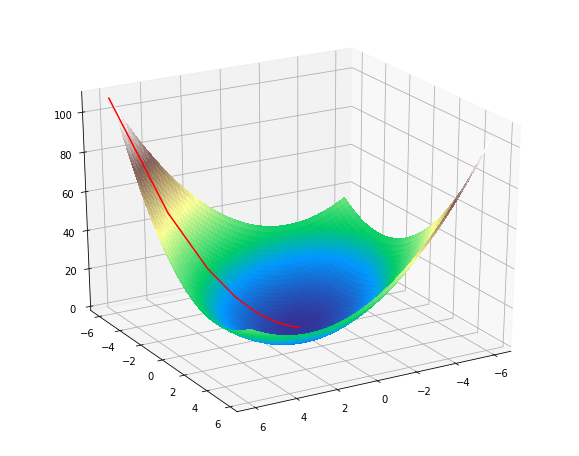

In [44]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def get_function_value(point):
    x = point[0]
    y = point[1]
    return x**2 + y**2 - x*y

def gradient(point):
    x = point[0]
    y = point[1]
    d_x = 2*x-y
    d_y = 2*y-x
    return np.array([d_x, d_y])

def gradient_descent(function, gradient, point_0, alpha=0.1, eps=1E-5):
    path = []
    point_0 = np.array([point_0]).T
    path.append(point_0.T[0])
    cur_point = point_0
    cur_grad = gradient(cur_point)
    next_point = cur_point - alpha * cur_grad
    while (abs(function(cur_point) - function(next_point)) > eps):
        cur_point = next_point
        path.append(next_point.T[0])
        cur_grad = gradient(cur_point)
        next_point = cur_point - alpha * cur_grad
    return np.array(path)

x = np.arange(-6, 6, 0.25)
y = np.arange(-6, 6, 0.25)
x, y = np.meshgrid(x, y)
path = gradient_descent(get_function_value, gradient, [6, -6], 0.1)
x_path = path[:,0]
y_path = path[:,1]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, get_function_value([x, y]), cmap=cm.terrain, antialiased=False)
ax.plot(x_path, y_path, get_function_value([x_path, y_path]), 'r')
ax.view_init(25, 60)
plt.show()

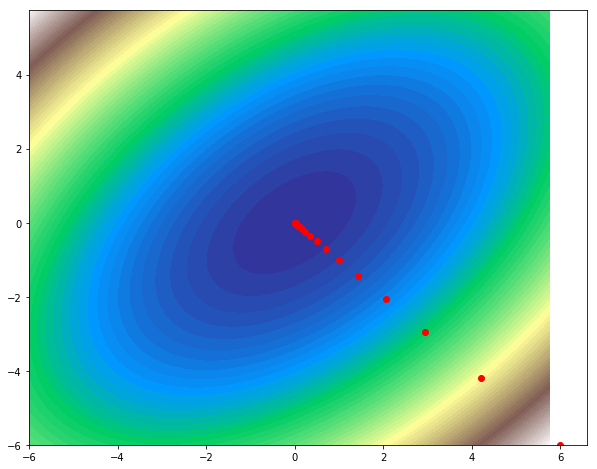

In [45]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.contourf(x, y, get_function_value([x, y]), 100, cmap=cm.terrain)
ax.plot(x_path, y_path, 'ro')
plt.show()

Шаг $\lambda$ выбирался достаточно большой чтобы алгоритм быстро сходился, однако не слишком большой чтобы не перескочить минимум.

There is category of function which naive gradient descent works poorly for, e.g. [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function).
$$f(x, y) = (1-x)^2 + 100(y-x^2)^2.$$

#### Exercises
1. Repeat previous steps for Rosenbrock function.
2. What problem do you face?
3. Is there any solution?

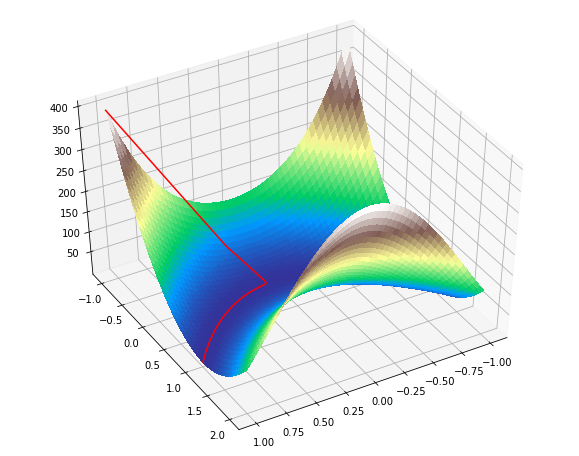

In [46]:
def Rosenbrock_function(point):
    x = point[0]
    y = point[1]
    return (1-x)**2 + 100*(y-x**2)**2

def Rosenbrock_gradient(point):
    x = point[0]
    y = point[1]
    d_x = 400 * x * (x ** 2 - y) + 2 * (x - 1)
    d_y = 200 * (y - x ** 2)
    return np.array([d_x, d_y])

x = np.arange(-1, 1, 0.01)
y = np.arange(-1, 2, 0.01)
x, y = np.meshgrid(x, y)
path = gradient_descent(Rosenbrock_function, Rosenbrock_gradient, [1, -1], 0.001, 1E-7)
x_path = path[:,0]
y_path = path[:,1]

#print(x_path[-1], y_path[-1])
#print(len(x_path))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, Rosenbrock_function([x, y]), cmap=cm.terrain, antialiased=False)
ax.plot(x_path, y_path, Rosenbrock_function([x_path, y_path]), 'r')
ax.view_init(45, 60)
plt.show()

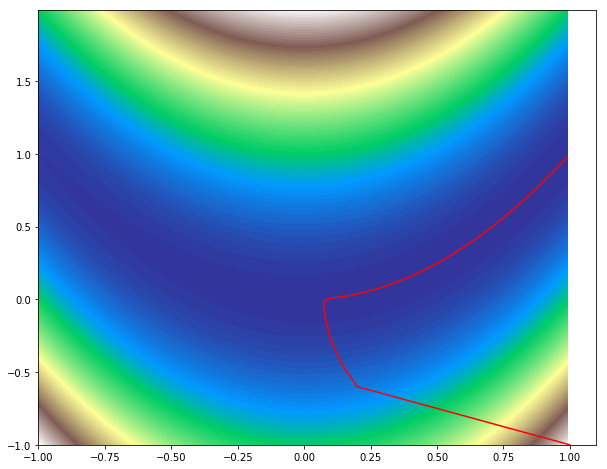

In [47]:
g = plt.figure(figsize=(10, 8))
ax = g.add_subplot(111)
ax.contourf(x, y, Rosenbrock_function([x, y]), 100, cmap=cm.terrain)
ax.plot(x_path, y_path, 'r-')
plt.show()

Проблема состоит в том что минимум находится в конце своеобразного плато, на нём шаг алгоритма становится слишком маленьким и алгоритм сходится в минимум очень долго. Это происходит так как градиент становится очень маленьким.

There are some variations of the method, for example steepest descent, where we find optimal $\lambda$ for each step.
$$\lambda^{k} = \arg\min_{\lambda}Q(x_k - \lambda\triangledown Q(x_k)).$$

#### Exercises
1. Split red and blue sets of points again. Train linear model using gradient descent and MSE.
2. Plot your splitting line. Compare with analytical solution.
3. Try steepest descent.
4. Comare gradient descent methods and show its convergence in axes $[step \times Q]$.

Среднеквадратичная ошибка градиентного спуска: 0.278304136227
Количество шагов: 231


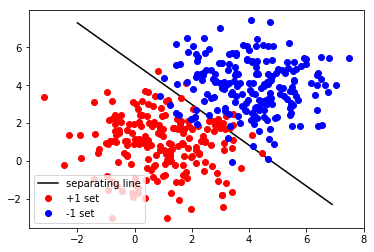

In [48]:
np.random.seed(126)
red_points = np.random.multivariate_normal((1, 1), np.eye(2)*2, 200)
blue_points = np.random.multivariate_normal((4, 4), np.eye(2)*2, 200)
X = np.concatenate((red_points, blue_points), axis=0)
X = np.concatenate((X, np.ones((len(X), 1))), axis=1)
Y = np.concatenate((np.ones((len(red_points), 1)), -np.ones((len(blue_points), 1))), axis=0)

def MSE_loss(point):
    return ((np.dot(X, point) - Y)**2).sum()/len(Y)

def MSE_gradient(point):
    common = 2 * (np.dot(X, point) - Y)
    return np.dot(X.T, common)

path_grad = gradient_descent(MSE_loss, MSE_gradient, [0, 0, 0], 0.0001, 1E-7)
w_grad = path_grad[-1]
print("Среднеквадратичная ошибка градиентного спуска:", MSE_loss(np.array([w_grad]).T))
print("Количество шагов:", len(path_grad))

plt.plot(x_range, separating_line(w_grad, x_range), 'k', label='separating line')
plt.plot(red_points[:,0], red_points[:,1], 'or', label='+1 set')
plt.plot(blue_points[:,0], blue_points[:,1], 'ob', label = '-1 set')
plt.legend()
plt.show()

Среднеквадратичная ошибка аналитического решения: 0.278302251783


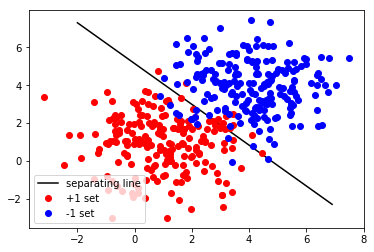

In [49]:
w_exact = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
print("Среднеквадратичная ошибка аналитического решения:", MSE_loss(w_exact))

plt.plot(x_range, separating_line(w_exact, x_range), 'k', label='separating line')
plt.plot(red_points[:,0], red_points[:,1], 'or', label='+1 set')
plt.plot(blue_points[:,0], blue_points[:,1], 'ob', label = '-1 set')
plt.legend()
plt.show()

Попробуем применить метод наискорейшего спуска. Для этого нам на каждом шаге градиентного спуска нужно вычислять оптимальное $\lambda$ которое задаётся следующим образом: 
$$\lambda^{k} = \arg\min_{\lambda}Q(x_k - \lambda\triangledown Q(x_k))$$
Тогда в нашем случае нам нужно решить задачу: $$\lambda = \arg\min_{\lambda} \big ( \sum \limits_{x, y} (x^{T} \cdot (w - \lambda\triangledown Q(w)) - y)^2 \big ) \big /n$$
Где $x$ это признаки конкретного обьекта $w$ это коэффициенты классификатора на этом шаге, а $y$ это ответ для этого обьекта. Решим эту задачу аналитически, возьмём производную нашей функции приравняем её нулю и выразим $\lambda$ (ещё домножим на $n$, поделим на 2 и обозначим градиент за $\triangledown$):
$$\sum \limits_{x, y} (x^{T} \cdot (w - \lambda\triangledown) - y) \cdot (- x^{T} \triangledown) = 0$$
$$\sum \limits_{x, y} (-x^{T} w x^{T} \triangledown + \lambda x^{T} \triangledown x^{T} \triangledown + y x^{T} \triangledown) = 0$$
$$\lambda = \frac{\sum \limits_{x, y} (x^{T} w x^{T} \triangledown - y x^{T} \triangledown)}{\sum \limits_{x, y} (x^{T} \triangledown x^{T} \triangledown)} = \frac{\sum \limits_{x, y} (x^{T} w - y)(x^{T} \triangledown)}{\sum \limits_{x, y} (x^{T} \triangledown)^2}$$
Теперь модифицируем наш градиентный спуск:

Среднеквадратичная ошибка наискорейшего спуска: 0.278333420503
Количество шагов: 25


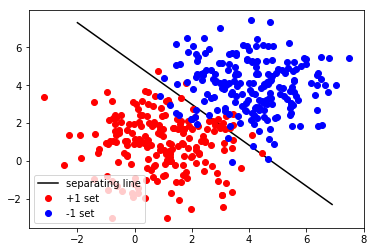

In [50]:
def steepest_gradient_descent(function, gradient, opt_alpha, point_0, eps=1E-5):
    path = []
    point_0 = np.array([point_0]).T
    path.append(point_0.T[0])
    cur_point = point_0
    cur_grad = gradient(cur_point)
    alpha = opt_alpha(cur_point, cur_grad)
    next_point = cur_point - alpha * cur_grad
    while (abs(function(cur_point) - function(next_point)) > eps):
        cur_point = next_point
        path.append(next_point.T[0])
        cur_grad = gradient(cur_point)
        alpha = opt_alpha(cur_point, cur_grad)
        next_point = cur_point - alpha * cur_grad
    return np.array(path)

def MSE_optimal_alpha(point, gradient):
    first_sum = ((np.dot(X, point) - Y) * np.dot(X, gradient)).sum()
    second_sum = (np.dot(X, gradient)**2).sum()
    return first_sum / second_sum

path_steepest = steepest_gradient_descent(MSE_loss, MSE_gradient, MSE_optimal_alpha, [0, 0, 0])
w_steepest = path_steepest[-1]
print("Среднеквадратичная ошибка наискорейшего спуска:", MSE_loss(np.array([w_steepest]).T))
print("Количество шагов:", len(path_steepest))

plt.plot(x_range, separating_line(w_steepest, x_range), 'k', label='separating line')
plt.plot(red_points[:,0], red_points[:,1], 'or', label='+1 set')
plt.plot(blue_points[:,0], blue_points[:,1], 'ob', label = '-1 set')
plt.legend()
plt.show()

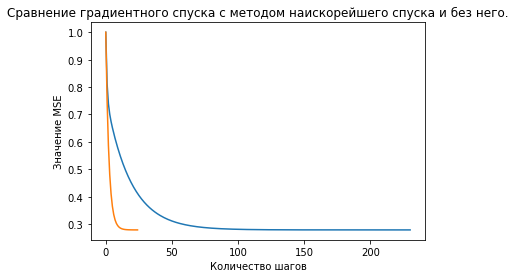

In [51]:
MSE_grad = []
for point in path_grad:
    MSE_grad.append(MSE_loss(np.array([point]).T))
    
MSE_steepest = []
for point in path_steepest:
    MSE_steepest.append(MSE_loss(np.array([point]).T))
    
plt.plot(np.arange(0, 231), MSE_grad)
plt.plot(np.arange(0, 25), MSE_steepest)
plt.title("Сравнение градиентного спуска с методом наискорейшего спуска и без него.")
plt.xlabel("Количество шагов")
plt.ylabel("Значение MSE")
plt.legend()
plt.show()

### 6. Stochastic gradient descent

Sometimes you have so huge amount of data, that usual gradient descent becomes too slow. One more option, we have deal with data flow. In this case stochastic gradient method appears on the stage. The idea is simple. You can do a descent step, calculating error and gradient not for all samples, but for some small batch only.

#### Еxercises
1. Download [mnist](https://www.kaggle.com/c/digit-recognizer).
2. Train linear classificator for digits 0 and 1, using logistic loss function and stochastic gradient descent.
3. Use holdout to check [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision) of classification.
4. How do accuracy and training time depend on bathch size?
5. Plot graphic that proves your words.
6. How many epochs you use? Why?
7. Plot value of loss function for each step (try use [exponential smoothing](https://en.wikipedia.org/wiki/Exponential_smoothing)).

In [52]:
import pandas as pd
data = pd.read_csv("train.csv", sep = ',')
data = data[data['label'] < 2].sample(frac=1).values
data = np.concatenate((data, np.ones((len(data), 1))), axis=1)

train_X = data[:int(len(data) * 0.8), 1:]
train_Y = np.array([data[:int(len(data) * 0.8),0]]).T
train_Y[train_Y == 0] = -1

test_X = data[int(len(data) * 0.8):, 1:]
test_Y = np.array([data[int(len(data) * 0.8):,0]]).T
test_Y[test_Y == 0] = -1

Наша функция потери сейчас имеет вид: $$\frac{1}{n} \sum \limits_{x, y} \ln(1 + e^{(-yx^Tw)})$$
Посмотрим как выглядит производная этой функции по переменной $w_i$:
$$\frac{1}{n} \sum \limits_{x, y} \big ( \frac{1}{1+e^{(-yx^Tw)}} \cdot e^{(-yx^Tw)} \cdot (-yx_iw_i) \big ) = 
\frac{1}{n} \sum \limits_{x, y} \big ( \frac{-y}{1+e^{(yx^Tw)}} \cdot (x_iw_i) \big )  $$

In [53]:
def log_loss(point, X, Y):
    log_sum = 0
    for i in range(len(X)):
        log_sum += np.log(1 + np.e**(-Y[i]*np.dot(X[i], point)))
    return log_sum / len(X)

def log_gradient(point, X, Y):
    common = -Y / (1 + np.e ** ((np.dot(X, point)) * Y))
    return np.dot(X.T, common) / len(X)

def stochastic_gradient_decent(function, gradient, X, Y, point_0, epochs=10, alpha=1E-4, bathch_size=100):
    path = []
    point_0 = np.array([point_0]).T
    path.append(point_0.T[0])
    cur_point = point_0
    bathch_separators = tuple(np.arange(bathch_size, len(X), bathch_size))
    bathch_X = np.vsplit(X, bathch_separators)
    bathch_Y = np.vsplit(Y, bathch_separators)
    while(epochs > 0):
        for i in range(len(bathch_X)):
            cur_grad = gradient(cur_point, bathch_X[i], bathch_Y[i])
            cur_point = cur_point - alpha * cur_grad
            path.append(cur_point.T[0])
        epochs -= 1
    return np.array(path)

point_0 = np.zeros(len(train_X[0]))
stochastic_path = stochastic_gradient_decent(log_loss, log_gradient, train_X, train_Y, point_0)

#### Momentum method
Stochastic gradient descent with momentum remembers the update of $x$ at each iteration, and determines the next update as a linear combination of the gradient and the previous update
$$x^{k+1} = x^{k} - s^{k},$$ where $s^k = \gamma s^{k-1} + \lambda\triangledown Q(x^k)$, $0 <\gamma < 1$ – smoothing ratio and $s^{-1} = 0$.

#### Еxercises
1. Find minimum for $Q(x,y)=10x^2+y^2$ with descent method.
2. Use momentum method and compare pathes.
3. How do you choose $\gamma$?

In [56]:
def quadric_value(point):
    x = point[0]
    y = point[1]
    return 10*x**2 + y**2

def quadric_gradient(point):
    x = point[0]
    y = point[1]
    d_x = 20*x
    d_y = 2*y
    return np.array([d_x, d_y])

def momentum_gradient_descent(function, gradient, point_0, gamma = 0.7, alpha=0.1, eps=1E-5):
    path = []
    point_0 = np.array([point_0]).T
    path.append(point_0.T[0])
    cur_point = point_0
    cur_grad = gradient(cur_point)
    next_point = cur_point - alpha * cur_grad
    momentum = next_point - cur_point
    while (abs(function(cur_point) - function(next_point)) > eps):
        cur_point = next_point
        path.append(next_point.T[0])
        cur_grad = gradient(cur_point)
        next_point = cur_point - gamma * momentum - alpha * cur_grad
        momentum = next_point - cur_point
    return np.array(path)

path = gradient_descent(quadric_value, quadric_gradient, [5, 5])
print(path)
print(len(path))

[[  5.00000000e+00   5.00000000e+00]
 [ -5.00000000e+00   4.00000000e+00]
 [  5.00000000e+00   3.20000000e+00]
 [ -5.00000000e+00   2.56000000e+00]
 [  5.00000000e+00   2.04800000e+00]
 [ -5.00000000e+00   1.63840000e+00]
 [  5.00000000e+00   1.31072000e+00]
 [ -5.00000000e+00   1.04857600e+00]
 [  5.00000000e+00   8.38860800e-01]
 [ -5.00000000e+00   6.71088640e-01]
 [  5.00000000e+00   5.36870912e-01]
 [ -5.00000000e+00   4.29496730e-01]
 [  5.00000000e+00   3.43597384e-01]
 [ -5.00000000e+00   2.74877907e-01]
 [  5.00000000e+00   2.19902326e-01]
 [ -5.00000000e+00   1.75921860e-01]
 [  5.00000000e+00   1.40737488e-01]
 [ -5.00000000e+00   1.12589991e-01]
 [  5.00000000e+00   9.00719925e-02]
 [ -5.00000000e+00   7.20575940e-02]
 [  5.00000000e+00   5.76460752e-02]
 [ -5.00000000e+00   4.61168602e-02]
 [  5.00000000e+00   3.68934881e-02]
 [ -5.00000000e+00   2.95147905e-02]
 [  5.00000000e+00   2.36118324e-02]
 [ -5.00000000e+00   1.88894659e-02]
 [  5.00000000e+00   1.51115727e-02]
 

#### Nesterov accelerated gradient
And the logical development of this approach leads to the accelerated Nesterov's gradient. The descent step is calculated a little differently
$$s^k = \gamma s^{k-1} + \lambda\triangledown Q(x^k - \gamma s^{k-1}),$$
so we find gradient at the point which moment will move us.

#### Еxercises
1. Compare this method and previous with Rosenbrock function.
2. Plot traces of both algorithms.

#### Adagrad (2011)
Adaptive gradient finds lambda for each dimension of the input vector x. Informally speaking, for sparce features it makes a bigger step, but for regular ones smaller step.
$$x_{i}^{k + 1} = x_{i}^{k} - \frac{\lambda}{\sqrt{G_{i, i}^k } + \varepsilon} \cdot \frac{\partial Q}{\partial x_i}(x^k),$$
* $G^{k} = \sum_{t=1}^{k}g_t g_t^{T}$, где $g_t = \triangledown Q(x^t)$.
* $\varepsilon$ - epsilon to avoid division by zero.
It improves convergence of the learning process (e.g. when using neural networks for text).

#### RMSprop
To avoid growth of the denominator we can use the following modification. Let's calculate the matrix $G^k$ only for a small number of latest steps, it can be done for example using exponential smoothing.
$$G^{k+1} = \gamma G^{k} + (1 - \gamma)g_{k+1}g_{k+1}^{T},$$
where $0< \gamma < 1$ - smoothing factor

#### Еxercises
1. Read about adadelta and adam (links below).
2. Give an example of a function that can show the difference in the studied stohastic gradient methods.
3. Show animation step by step how methods work.
4. Use your favorite method on mnist dataset again.
5. Show convergence of alrotigthm.
6. Check quality, using holdout.

#### Papers
1. [Adadelta (2012)](https://arxiv.org/pdf/1212.5701.pdf)
2. [Adam (2015)](https://arxiv.org/pdf/1412.6980.pdf)